In [98]:
import sys
import pandas as pd
sys.path.insert(0,'..')  # Needed to import package in parent dir, remove this if you pip installed the package
from soan.whatsapp import helper      # Helper to prepare the data
from soan.whatsapp import general     # General statistics
from soan.whatsapp import tf_idf      # To calculate TF-IDF
from soan.whatsapp import emoji       # To analyze emoji use
from soan.whatsapp import topic       # Topic modelling and summarization
from soan.whatsapp import sentiment   # Sentiment Analysis
import wordcloud   # Create Word Clouds

from soan.colors   import colors      # Frequent Color Visualization

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
df = helper.import_data('C:/PP/Test2.txt')
df = helper.preprocess_data(df)




if False:
    user_labels = {old: new for old, new in zip(sorted(df.User.unique()), ['Her', 'Me'])}
    df.User = df.User.map(user_labels)

In [100]:
general.print_users(df)

#############
##  Users  ##
#############

To (Cs1)
Seng (Cs1)​
Owen (Cs1)​
+856 20 59 474 689
Jo (Cs1)​
+856 20 58 281 735
Maxnum New
Peter(1cs1)
+856 20 55 729 011
+856 20 95 366 008
+856 20 91 239 912
Dao ~(°¬°)​~
Lex (cs1).
+856 20 78 928 341
+856 20 52 072 304
+856 20 58 299 105
+856 20 55 289 872
+856 20 58 610 046
Bee(cs1)​
Johnny (CS1)​
Joc (CS1)
+856 20 92 091 509
+856 20 58 281 176
+856 20 58 913 061
+856 20 56 964 804
+856 20 54 540 775
Taiy(CS1)
Nangnoi (Cs1)​
+856 20 98 291 129
+856 20 59 087 945
+856 20 99 848 696
+856 20 59 256 631
+856 20 58 861 012
A(cs1)
+856 20 97 053 777
+856 20 58 016 764
+856 20 93 206 231
+856 20 55 066 588
Out (Cs1)
Big(cs1)
Lex (Cs1)​
+856 20 91 593 816
Vieng (cs1)​
+856 20 58 429 926
+856 20 56 789 070
+856 20 93 171 593
+856 20 97 860 630
+856 20 54 829 820
+856 20 58 403 070
+856 20 95 924 332
+856 20 55 651 153


In [101]:
df1= helper.preprocess_data(df)
df1.to_csv('amd 2015.csv')
df1=pd.read_csv('amd 2015.csv',parse_dates=['Date'],index_col='Date')#,index_col='Date'
df1=pd.DataFrame(df1,columns=[ 'User', 'Message_Clean'])
def barChart(xValues, yValues, bTitle, xLable, yLable):
    

    plt.bar(xValues, yValues,width=0.8)
    plt.title(bTitle)
    plt.xlabel(xLable)
    plt.ylabel(yLable)
    plt.show()
df1


,User,Message_Clean
Date,,
2019-01-11 03:26:00,To (Cs1),หายหมดละเด้
2019-01-11 03:27:00,To (Cs1),🤣
2019-01-11 04:36:00,To (Cs1),ແບບນີ້ບໍ່ໄດ້ຫວາ
2019-01-11 06:09:00,Seng (Cs1)​,วาว
2019-01-11 06:09:00,Seng (Cs1)​,เคๆๆๆ
...,...,...
2020-12-11 21:01:00,Nangnoi (Cs1)​,ຊື້ໃໝ່
2020-12-11 21:02:00,Nangnoi (Cs1)​,mac ລຸ້ນໃໝ່ກຳລັງສິອອກ
2020-12-11 21:06:00,+856 20 78 928 341,hahaha


In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26749 entries, 2019-01-11 03:26:00 to 2020-12-11 21:07:00
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User           26749 non-null  object
 1   Message_Clean  26749 non-null  object
dtypes: object(2)
memory usage: 626.9+ KB


In [103]:
df1['Year']=df1.index.year
df1['Month']=df1.index.month
df1['Week']=df1.index.week
df1['Day']=df1.index.day
df1['Hour']=df1.index.hour
df1

<ipython-input-103-7bebf349cd01>:3: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



,User,Message_Clean,Year,Month,Week,Day,Hour
Date,,,,,,,
2019-01-11 03:26:00,To (Cs1),หายหมดละเด้,2019,1,2,11,3
2019-01-11 03:27:00,To (Cs1),🤣,2019,1,2,11,3
2019-01-11 04:36:00,To (Cs1),ແບບນີ້ບໍ່ໄດ້ຫວາ,2019,1,2,11,4
2019-01-11 06:09:00,Seng (Cs1)​,วาว,2019,1,2,11,6
2019-01-11 06:09:00,Seng (Cs1)​,เคๆๆๆ,2019,1,2,11,6
...,...,...,...,...,...,...,...
2020-12-11 21:01:00,Nangnoi (Cs1)​,ຊື້ໃໝ່,2020,12,50,11,21
2020-12-11 21:02:00,Nangnoi (Cs1)​,mac ລຸ້ນໃໝ່ກຳລັງສິອອກ,2020,12,50,11,21
2020-12-11 21:06:00,+856 20 78 928 341,hahaha,2020,12,50,11,21


In [104]:
df1=df1.rename(columns = {'Message_Clean':'Message'})
df1


,User,Message,Year,Month,Week,Day,Hour
Date,,,,,,,
2019-01-11 03:26:00,To (Cs1),หายหมดละเด้,2019,1,2,11,3
2019-01-11 03:27:00,To (Cs1),🤣,2019,1,2,11,3
2019-01-11 04:36:00,To (Cs1),ແບບນີ້ບໍ່ໄດ້ຫວາ,2019,1,2,11,4
2019-01-11 06:09:00,Seng (Cs1)​,วาว,2019,1,2,11,6
2019-01-11 06:09:00,Seng (Cs1)​,เคๆๆๆ,2019,1,2,11,6
...,...,...,...,...,...,...,...
2020-12-11 21:01:00,Nangnoi (Cs1)​,ຊື້ໃໝ່,2020,12,50,11,21
2020-12-11 21:02:00,Nangnoi (Cs1)​,mac ລຸ້ນໃໝ່ກຳລັງສິອອກ,2020,12,50,11,21
2020-12-11 21:06:00,+856 20 78 928 341,hahaha,2020,12,50,11,21


In [105]:
df1

,User,Message,Year,Month,Week,Day,Hour
Date,,,,,,,
2019-01-11 03:26:00,To (Cs1),หายหมดละเด้,2019,1,2,11,3
2019-01-11 03:27:00,To (Cs1),🤣,2019,1,2,11,3
2019-01-11 04:36:00,To (Cs1),ແບບນີ້ບໍ່ໄດ້ຫວາ,2019,1,2,11,4
2019-01-11 06:09:00,Seng (Cs1)​,วาว,2019,1,2,11,6
2019-01-11 06:09:00,Seng (Cs1)​,เคๆๆๆ,2019,1,2,11,6
...,...,...,...,...,...,...,...
2020-12-11 21:01:00,Nangnoi (Cs1)​,ຊື້ໃໝ່,2020,12,50,11,21
2020-12-11 21:02:00,Nangnoi (Cs1)​,mac ລຸ້ນໃໝ່ກຳລັງສິອອກ,2020,12,50,11,21
2020-12-11 21:06:00,+856 20 78 928 341,hahaha,2020,12,50,11,21


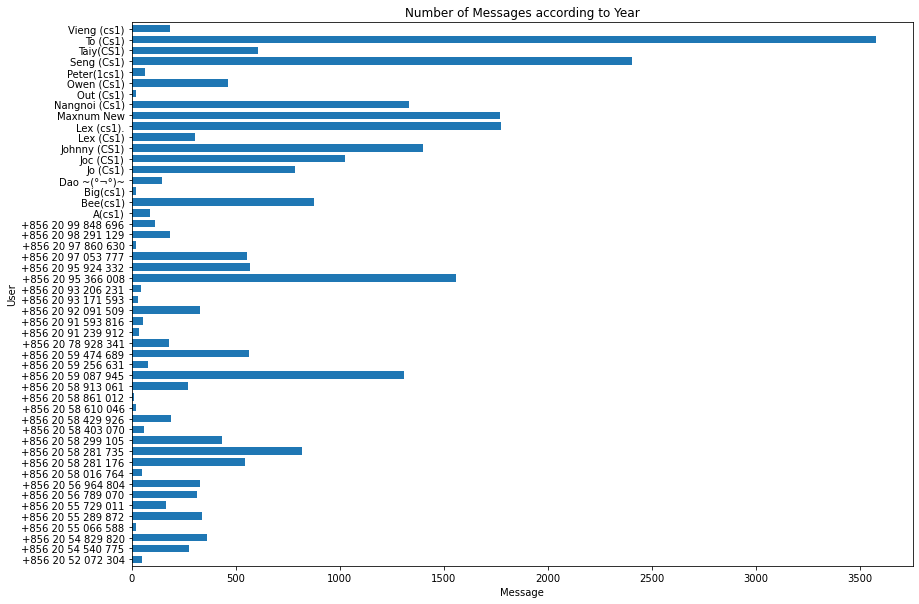

In [106]:
import matplotlib.pyplot as plt
df2=df1.groupby(['User']).count()['Message']
df2.max()

df2.plot.barh( title='Number of Messages according to Year',figsize=(14, 10),width=0.7)
plt.xlabel('Message')
plt.show()

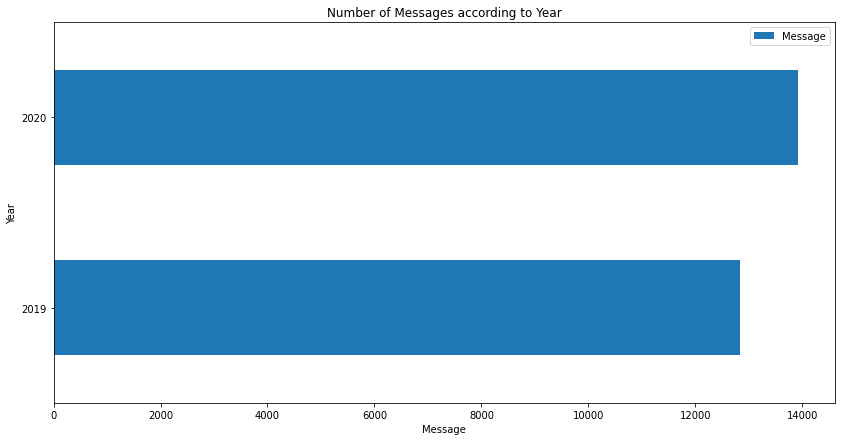

<Figure size 432x288 with 0 Axes>

In [107]:

df2=df1.groupby(['Year']).count()['Message'].to_frame()

df2.plot.barh( title='Number of Messages according to Year',figsize=(14, 7))
plt.xlabel('Message')
plt.show()
plt.savefig('2.png')

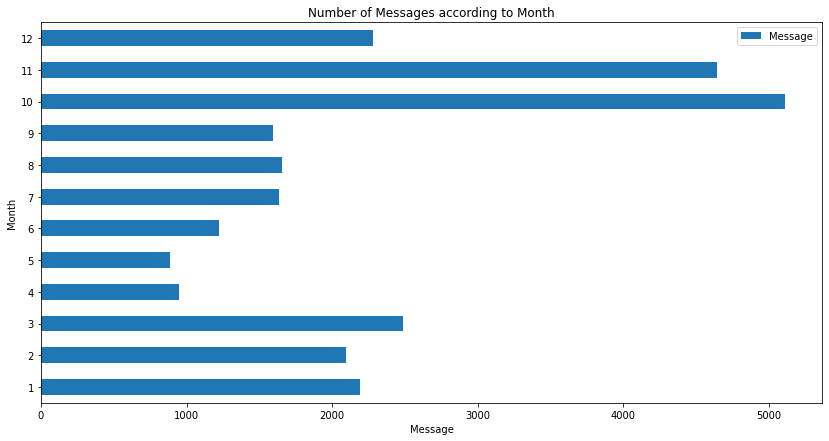

<Figure size 432x288 with 0 Axes>

In [108]:
df2=df1.groupby(['Month']).count()['Message'].to_frame()
df2.plot.barh( title='Number of Messages according to Month',figsize=(14, 7))
plt.xlabel('Message')
plt.show()
plt.savefig('3.png')

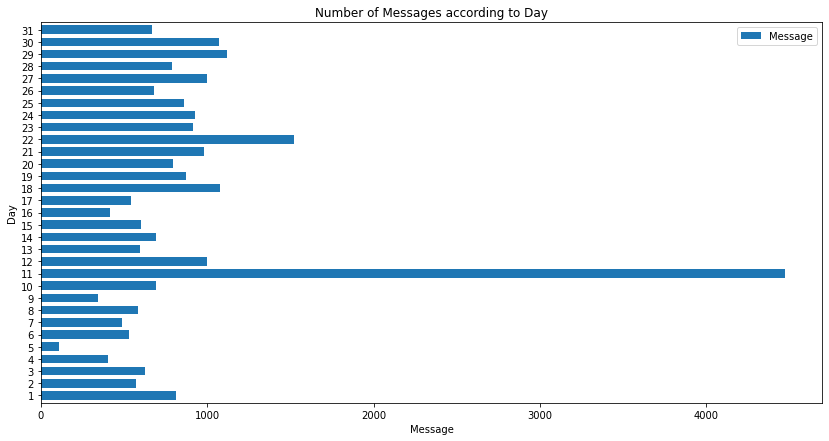

<Figure size 432x288 with 0 Axes>

In [109]:
df2=df1.groupby(['Day']).count()['Message'].to_frame()
df2.plot.barh( title='Number of Messages according to Day',figsize=(14, 7),width=0.7)
plt.xlabel('Message')
plt.show()
plt.savefig('4.png')

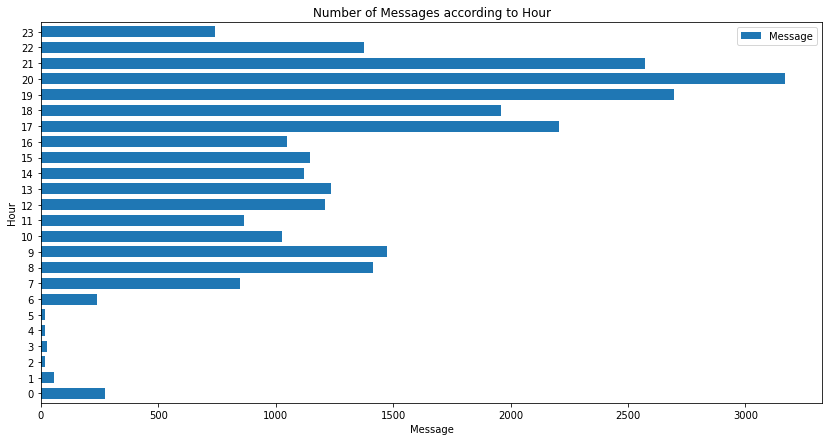

<Figure size 432x288 with 0 Axes>

In [110]:
df2=df1.groupby(['Hour']).count()['Message'].to_frame()
df2.plot.barh( title='Number of Messages according to Hour',figsize=(14, 7),width=0.7)
plt.xlabel('Message')
plt.show()
plt.savefig('5.png')

In [111]:
df['User']

1178               To (Cs1)
1179               To (Cs1)
1181               To (Cs1)
8049            Seng (Cs1)​
8050            Seng (Cs1)​
                ...        
7340         Nangnoi (Cs1)​
7341         Nangnoi (Cs1)​
30769    +856 20 78 928 341
30770    +856 20 78 928 341
30771    +856 20 78 928 341
Name: User, Length: 26754, dtype: object

In [112]:
df1=general.print_users(df)


#############
##  Users  ##
#############

To (Cs1)
Seng (Cs1)​
Owen (Cs1)​
+856 20 59 474 689
Jo (Cs1)​
+856 20 58 281 735
Maxnum New
Peter(1cs1)
+856 20 55 729 011
+856 20 95 366 008
+856 20 91 239 912
Dao ~(°¬°)​~
Lex (cs1).
+856 20 78 928 341
+856 20 52 072 304
+856 20 58 299 105
+856 20 55 289 872
+856 20 58 610 046
Bee(cs1)​
Johnny (CS1)​
Joc (CS1)
+856 20 92 091 509
+856 20 58 281 176
+856 20 58 913 061
+856 20 56 964 804
+856 20 54 540 775
Taiy(CS1)
Nangnoi (Cs1)​
+856 20 98 291 129
+856 20 59 087 945
+856 20 99 848 696
+856 20 59 256 631
+856 20 58 861 012
A(cs1)
+856 20 97 053 777
+856 20 58 016 764
+856 20 93 206 231
+856 20 55 066 588
Out (Cs1)
Big(cs1)
Lex (Cs1)​
+856 20 91 593 816
Vieng (cs1)​
+856 20 58 429 926
+856 20 56 789 070
+856 20 93 171 593
+856 20 97 860 630
+856 20 54 829 820
+856 20 58 403 070
+856 20 95 924 332
+856 20 55 651 153


In [113]:
user = "All"
language = "english"

In [114]:
#d=general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)


In [115]:
#general.plot_day_spider(df, colors=None, savefig=False, dpi=100)

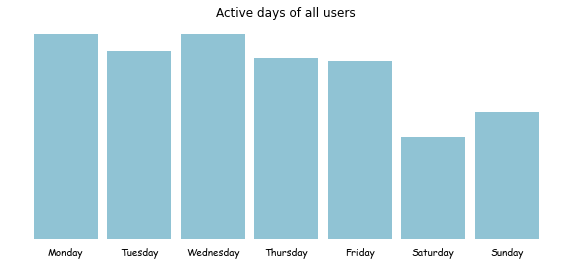

In [116]:
general.plot_active_days(df, savefig=False, dpi=100, user='All')

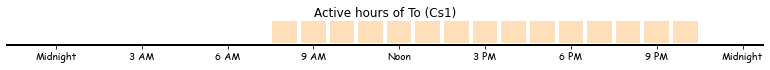

<Figure size 432x288 with 0 Axes>

In [117]:
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='To (Cs1)')
plt.savefig('7.png')

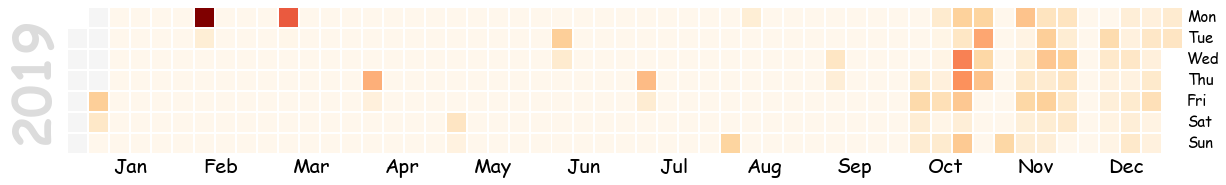

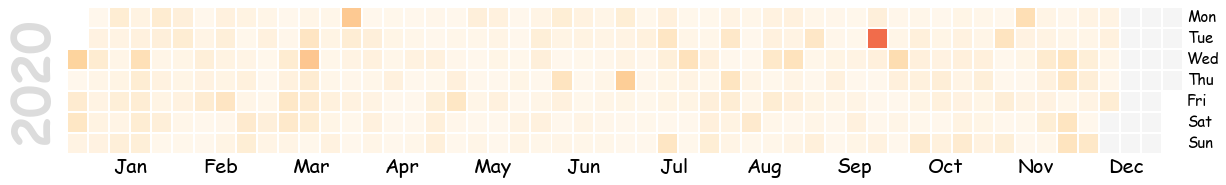

In [118]:
years = set(pd.DatetimeIndex(df.Date.values).year)

for year in years:
    general.calendar_plot(df, year=year, how='count', column='index')
#plt.savefig('8.png')

In [119]:
df2=general.print_stats(df)


##########################
##  Number of Messages  ##
##########################

3577	To (Cs1)
2407	Seng (Cs1)​
462	Owen (Cs1)​
565	+856 20 59 474 689
786	Jo (Cs1)​
820	+856 20 58 281 735
1772	Maxnum New
66	Peter(1cs1)
164	+856 20 55 729 011
1560	+856 20 95 366 008
37	+856 20 91 239 912
146	Dao ~(°¬°)​~
1776	Lex (cs1).
180	+856 20 78 928 341
48	+856 20 52 072 304
437	+856 20 58 299 105
337	+856 20 55 289 872
22	+856 20 58 610 046
877	Bee(cs1)​
1399	Johnny (CS1)​
1025	Joc (CS1)
330	+856 20 92 091 509
546	+856 20 58 281 176
273	+856 20 58 913 061
329	+856 20 56 964 804
276	+856 20 54 540 775
610	Taiy(CS1)
1336	Nangnoi (Cs1)​
184	+856 20 98 291 129
1310	+856 20 59 087 945
112	+856 20 99 848 696
77	+856 20 59 256 631
12	+856 20 58 861 012
87	A(cs1)
553	+856 20 97 053 777
52	+856 20 58 016 764
45	+856 20 93 206 231
22	+856 20 55 066 588
22	Out (Cs1)
19	Big(cs1)
306	Lex (Cs1)​
57	+856 20 91 593 816
183	Vieng (cs1)​
190	+856 20 58 429 926
314	+856 20 56 789 070
30	+856 20 93 171 593
23	+856 

+856 20 97 860 630
Messages: 	3
Day: 		2020-01-22

+856 20 54 829 820
Messages: 	125
Day: 		2020-09-22

+856 20 58 403 070
Messages: 	6
Day: 		2020-11-25

+856 20 95 924 332
Messages: 	55
Day: 		2020-09-22

+856 20 55 651 153
Messages: 	2
Day: 		2020-11-20



In [120]:
general.print_timing(df)

#####################################
##  Avg. Response Time in Minutes  ##
#####################################

To (Cs1):                     14.56
Seng (Cs1)​:                  20.04
Owen (Cs1)​:                  15.78
+856 20 59 474 689:           24.88
Jo (Cs1)​:                    27.95
+856 20 58 281 735:           13.04
Maxnum New:                   23.97
Peter(1cs1):                  4.83
+856 20 55 729 011:           7.33
+856 20 95 366 008:           10.25
+856 20 91 239 912:           21.34
Dao ~(°¬°)​~:                 19.48
Lex (cs1).:                   18.92
+856 20 78 928 341:           35.74
+856 20 52 072 304:           49.0
+856 20 58 299 105:           12.64
+856 20 55 289 872:           13.73
+856 20 58 610 046:           2.25
Bee(cs1)​:                    22.02
Johnny (CS1)​:                14.89
Joc (CS1):                    11.92
+856 20 92 091 509:           14.92
+856 20 58 281 176:           29.95
+856 20 58 913 061:           15.43
+856 20 56 964 804:      

In [121]:
#general.calendar_plot(df, year=2020, how='count', column = 'User', savefig=False, dpi=100)

In [122]:

counts = tf_idf.count_words_per_user(df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language=language, column="Word")

In [123]:
unique_words = tf_idf.get_unique_words(counts, df, version = 'A')


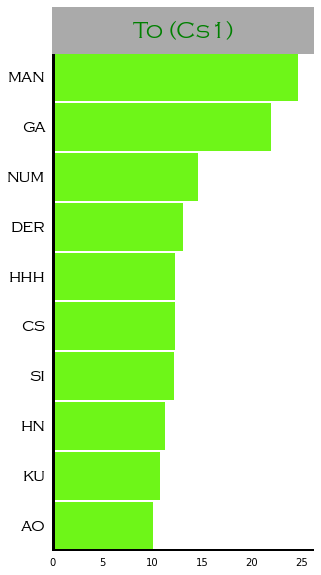

In [124]:
tf_idf.plot_unique_words(unique_words, 
                         user='To (Cs1)', 
                         image_path='C:/PP/1.jpeg', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title="To (Cs1)", 
                         title_color="green", 
                         title_background='#AAAAAA', 
                         width=25, 
                         height=50)
plt.savefig('8.png')

In [125]:
temp = df[['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text']].copy()
temp = emoji.prepare_data(temp)

# Count all emojis
counts = emoji.count_emojis(temp, non_unicode=True)

# Get unique emojis
list_of_words = [word for user in counts for word in counts[user]]
unique_emoji = emoji.get_unique_emojis(temp, counts, list_of_words)
del temp

In [126]:
emoji.print_stats(unique_emoji, counts)

#############################
### Unique Emoji (TF-IDF) ###
#############################

To (Cs1)
🤣 0.07145659259205303
😂 0.03368308601188732
🥴 0.01899382322866897

Seng (Cs1)​
😭 0.013086982175739508
😈 0.007191675353851666
:/ 0.006090715133084039

Owen (Cs1)​
🥳 0.014139472187569098
👍 0.005328217193813854
😁 0.004069083561701193

+856 20 59 474 689
😋 0.014138878614068139
🎂 0.011799282125629123
🎈 0.011780865564921668

Jo (Cs1)​
😜 0.008485674603056204
😁 0.008414853328659662
:/ 0.0074645332069120905

+856 20 58 281 735
👍 0.019812792597631343
😄 0.016434978137766638
😅 0.011702408063518807

Maxnum New
:/ 0.014175584199284058
🤪 0.00218173046982134
🌐 0.001506517114003633

Peter(1cs1)
🙂 0.04051982618922661
👍 0.038017623248732854
👽 0.020315309551465748

+856 20 55 729 011
🎉 0.024236810723993092
🎊 0.023894284706642895
😔 0.01586005715310791

+856 20 95 366 008
👍 0.01354294819911089
😤 0.005779161746069307
🤫 0.005081834954050435

+856 20 91 239 912
👽 0.03638317549085537
🖕🏼 0.03638317549085537
👁 0.03

In [127]:
emoji.get_unique_emojis(df, counts, list_of_words)

{'To (Cs1)': {'🤣': 0.07145659259205303,
  '😂': 0.03368308601188732,
  '🥴': 0.01899382322866897,
  '👍🏻': 0.005538758923051464,
  '😑': 0.00469160903738306,
  '🤦🏻': 0.005557598871242362,
  '♂': 0.005488932680636959,
  '😬': 0.003299667018654087,
  '🤪': 0.002523447881140658,
  '🥺': 0.0027526171708523862,
  '🌚': 0.002209263180613572,
  '😁': 0.0031564111720945895,
  '😐': 0.0016997434827319246,
  '👹': 0.0026118336554299994,
  '🙊': 0.0014924763745314282,
  '😅': 0.00118101486125794,
  '🥵': 0.001055136376681373,
  '🥱': 0.002225820314688656,
  '😳': 0.001391102468306376,
  '🤭': 0.0010974059869211421,
  '🤫': 0.002949848097097284,
  '😆': 0.0017742019786790074,
  '👀': 0.0011077705142755623,
  '😢': 0.0010135975097033158,
  '😕': 0.0007348106049033336,
  '🤨': 0.0007078733901848768,
  '👽': 0.0007462381872657142,
  '🖕🏼': 0.0007462381872657142,
  '🤧': 0.0007308980436638068,
  '😿': 0.0007316692470676108,
  '😍': 0.0007286806069222498,
  '👁': 0.0007462381872657142,
  '😒': 0.0007017037914450309,
  '🤢': 0.000746

In [128]:

topic.topics(df, model='lda', language="english")


################
### To (Cs1) ###
################


Topics in lda model:
Topic #0: message deleted cs yes im fitness copy
Topic #1: man deh ork lin attached file sun
Topic #2: pai hhh ku si num mue hhhh
Topic #3: wa hahaha der hun er hrng location
Topic #4: br la hn dai ga ao mg

###################
### Seng (Cs1)​ ###
###################


Topics in lda model:
Topic #0: deleted message rov xl br httpssharepbgcjcomrecallfriendphpcdngameidimageimagesffigsharejpgtitleeaeceepubgmobileeebeebdebbbbeaaefbccedebbeaefbeafebaaebbebeaeaefbceeaeeafbeaefbcarjyrdescripteaeceepubgmobileeebeebdebbbbeaaefbccedebbeaefbeafebaaebbebeaeaefbceeaeeafbeaefbcarjyrmoduleuidinvitecoderjyrsrcwhatsappregionjkadjusttyjhbddrkpemadjustdeeplinkigameaffmoduleduiddinvitecodedrjyrsrcdwhatsappadjustcampaignrecall hu
Topic #1: httpssharepbgcjcomrecallfriendphpcdngameidimageimagesffigsharejpgtitleeaeceepubgmobileeebeebdebbbbeaaefbccedebbeaefbeafebaaebbebeaeaefbceeaeeafbeaefbcarjyrdescripteaeceepubgmobileeebeebdebbbbeaaefb

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
import re
import regex
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline
!git clone https://github.com/amueller/word_cloud.git
% cd word_cloud
! pip install .


In [ ]:
def startsWithDateAndTimeAndroid(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

def startsWithDateAndTimeios(s):
    pattern = '^\[([0-9]+)([\/-])([0-9]+)([\/-])([0-9]+)[,]? ([0-9]+):([0-9][0-9]):([0-9][0-9])?[ ]?(AM|PM|am|pm)?\]' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [ ]:
def getDataPointAndroid(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(':') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

def getDataPointios(line):
	splitLine = line.split('] ')
	dateTime = splitLine[0]
	if ',' in dateTime:
		date, time = dateTime.split(',')
	else:
		date, time = dateTime.split(' ')
	message = ' '.join(splitLine[1:])
	if FindAuthor(message):
		splitMessage = message.split(':')
		author = splitMessage[0]
		message = ' '.join(splitMessage[1:])
	else:
		author = None
	if time[5]==":":
		time = time[:5]+time[-3:]
	else:
		if 'AM' in time or 'PM' in time:
			time = time[:6]+time[-3:]
		else:
			time = time[:6]
	return date, time, author, message

In [ ]:
def dateconv(date):
  year=''
  if '-' in date:
    year = date.split('-')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%d-%m-%Y").strftime("%Y-%m-%d")
    elif len(year) ==2:
      return datetime.datetime.strptime(date, "[%d-%m-%y").strftime("%Y-%m-%d")
  elif '/' in date:
    year = date.split('/')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%d/%m/%Y").strftime("%Y-%m-%d")
    if len(year) ==2:
      return datetime.datetime.strptime(date, "[%d/%m/%y").strftime("%Y-%m-%d")

In [ ]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list


In [ ]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = 'C:/PP/Test2.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    device=''
    first=fp.readline()
    print(first)
    if '[' in first:
      device='ios'
    else:
      device="android"
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        if device=="ios":
          line = line.strip()
          if startsWithDateAndTimeios(line):
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointios(line)
            messageBuffer.append(message)
          else:
            line= (line.encode('ascii', 'ignore')).decode("utf-8")
            if startsWithDateAndTimeios(line):
              if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
              messageBuffer.clear()
              date, time, author, message = getDataPointios(line)
              messageBuffer.append(message)
            else:
              messageBuffer.append(line)
        else:
          line = line.strip()
          if startsWithDateAndTimeAndroid(line):
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointAndroid(line)
            messageBuffer.append(message)
          else:
            messageBuffer.append(line)

In [ ]:
if device =='android':
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.dropna()
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
else:
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
        df = df.dropna()
        df["Date"] = df["Date"].apply(dateconv)
        df["Date"] = pd.to_datetime(df["Date"],format='%Y-%m-%d')
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [ ]:
df.head(2)
df = df.dropna()
total_messages = df.shape[0]
print(total_messages)

In [ ]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

In [ ]:
emojis = sum(df['emoji'].str.len())
print(emojis)

In [ ]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [ ]:
df

In [ ]:
links = np.sum(df.urlcount)

In [ ]:
df

In [ ]:
f1=df['urlcount']
f1

In [ ]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

In [ ]:
link_messages= df[df['urlcount']>0]
deleted_messages=df[(df["Message"] == " You deleted this message")| (df["Message"] == " This message was deleted.")|(df["Message"] == " You deleted this message.")]
media_messages_df = df[(df['Message'] == ' <Media omitted>')|(df['Message'] == ' image omitted')|(df['Message'] == ' video omitted')|(df['Message'] == ' sticker omitted')]
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(deleted_messages.index)
messages_df = messages_df.drop(link_messages.index)

In [ ]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [ ]:
messages_df.head(2)


In [ ]:

messages_df2=messages_df.groupby(['Author']).count()['emoji']
messages_df2

In [ ]:
l = messages_df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(link_messages[link_messages['Author'] == l[i]]["urlcount"])   
  print('Links Sent', links)   
  print()

In [ ]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

In [ ]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

In [ ]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

In [ ]:
df12=pd.DataFrame(df, columns=['Author'])

In [ ]:

fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
plt.savefig('9.png')

In [ ]:
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

In [ ]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)


In [ ]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()
plt.savefig('11.png')

In [ ]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
fig.show()
plt.savefig('12.png')

In [ ]:
""""date_df["rolling"] = date_df["MessageCount"].rolling(30).mean()
fig = px.line(date_df, x="Date", y="rolling")
fig.update_xaxes(nticks=15)
fig.show()
plt.savefig('13.png')"""

In [ ]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )

fig.show()
plt.savefig('14.png')

In [ ]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')
plt.savefig('15.png')

In [ ]:
messages_df['Date'].value_counts().head(10).plot.barh();
print(messages_df['Date'].value_counts());
plt.xlabel('Number of Messages');
plt.ylabel('Date');

In [ ]:
messages_df.iloc[messages_df['Word_Count'].argmax()]

In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))